In [31]:
# Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from nltk.tokenize  import word_tokenize
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.legend as leg

In [32]:
# Set up document text
report = pd.read_csv("open_ave_data2.csv")
report = report.iloc[:,2:6]
report.head()

,findings,clinicaldata,ExamName,impression
0,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.


In [33]:
# Check df columns
print("- Report df columns:")
print(report.columns)
print()

# Check df shape
print("- Report df shape:")
print(report.shape)
print()

# Convert pandas dataframe --> numpy array --> String
report_arr = report.values
report_arr = report_arr.reshape((report_arr.size,1))
temp_report_list = report_arr.tolist()

# String data Preprocessing: 
## Remove NAN value
imputer = SimpleImputer(strategy='constant', fill_value='')
temp2_report_list = imputer.fit_transform(temp_report_list)

## Force list type --> String type
temp3_report_list = [element[0] for element in temp2_report_list]

## Clean special characters & numeric
nltk.download('punkt') # Download Pre-trained NLP Tokenizer Model
def clean_text(text):
    words = word_tokenize(text)
    clean_text = ' '.join([word for word in words if word.isalpha()])
    return clean_text
report_list = [clean_text(text) for text in temp3_report_list]

# Check array shape
print("- List shape:")
print(len(report_list))
print()

- Report df columns:
Index(['findings', 'clinicaldata', 'ExamName', 'impression'], dtype='object')

- Report df shape:
(954, 4)



[nltk_data] Downloading package punkt to /Users/steveg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- List shape:
3816



In [34]:
# Generate tfidf embedding
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
# Normalize embedding with L2 
X = vectorizer.fit_transform(report_list)

In [35]:
# Print out unique words
print("- Unique Words:")
print(vectorizer.get_feature_names_out())
print()

# Print out any possible stop words
print("- Stop Words:")
print(vectorizer.stop_words_)
print()

# Get size of Tfi-idf matrix
print("- Size of matrix:")
print(X.shape)
print()

# Convert sparse row matrix type --> ndarray type
arr = X.toarray()

- Unique Words:
['abnormality' 'active' 'acute' 'adenopathy' 'ap' 'appear' 'atelectasis'
 'available' 'bilateral' 'bone' 'bones' 'bony' 'breath' 'cardiac'
 'cardiomediastinal' 'cardiopulmonary' 'chest' 'clear' 'clinical'
 'comparison' 'congestion' 'consolidation' 'contour' 'contours' 'cough'
 'data' 'date' 'dated' 'dictated' 'disease' 'edema' 'effusion' 'effusions'
 'electronically' 'endotracheal' 'evidence' 'evident' 'exam' 'fever'
 'findings' 'focal' 'frontal' 'heart' 'history' 'hours' 'id' 'impression'
 'indication' 'infiltrate' 'information' 'lateral' 'left' 'limitations'
 'limits' 'lung' 'lungs' 'md' 'mediastinal' 'mediastinum' 'mild'
 'negative' 'normal' 'obtained' 'opacities' 'osseous' 'pa' 'pain'
 'personalname' 'pleural' 'pm' 'pneumothorax' 'portable' 'prior'
 'procedure' 'process' 'pulmonary' 'radiograph' 'radiography' 'right'
 'seen' 'shortness' 'signed' 'significant' 'silhouette' 'single' 'size'
 'stable' 'structures' 'technique' 'tip' 'tube' 'tubes' 'unremarkable'
 'vascul

In [41]:
# Applying T-SNE Embedding
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30).fit_transform(X)

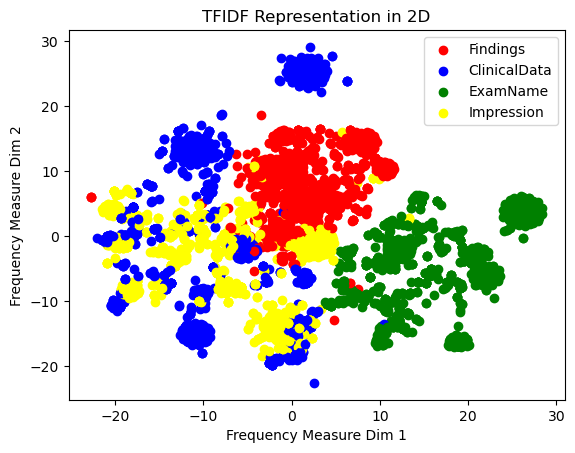

In [42]:
# Create array to map data with columns
map_arr = []
for row in report.itertuples(index=False):
    for col, cell in enumerate(row):
        map_arr.append((cell,int(col)))
Colors = ["red", "blue", "green", "yellow"]
        
        
# Visualize the Low-Dimensional Representation
fig, ax = plt.subplots()
for i in range(X_embedded.shape[0]):
    color_index = map_arr[i][1]
    color = Colors[color_index]
    ax.scatter(X_embedded[i][0], X_embedded[i][1], c=color)

ax.legend(["Findings", "ClinicalData", "ExamName", "Impression"])
plt.title("TFIDF Representation in 2D")
plt.xlabel("Frequency Measure Dim 1")
plt.ylabel("Frequency Measure Dim 2")
plt.show()